In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('E:/EM/individualTestOfDatasets/features_C_73.xlsx')
df2 = pd.read_excel('E:/EM/individualTestOfDatasets/features_R_great.xlsx')
df3 = pd.read_excel('E:/EM/individualTestOfDatasets/features_S_great.xlsx')
df4 = pd.read_excel('E:/EM/individualTestOfDatasets/features_T.xlsx')

In [3]:
concatenatedDF = pd.concat([df1, df2, df3, df4], axis=0)

In [6]:
concatenatedDF.head()
concatenatedDF.to_excel("featuresFrommAllIndividualCombinedDatasets.xlsx", index=False)

In [5]:
featuresofit = np.asarray(concatenatedDF.iloc[:,:-1].values)
X = featuresofit
labelofit = np.asarray(concatenatedDF['labels'])
Y = labelofit

In [6]:
emotionsfromFeatures = concatenatedDF['labels']
emotionCountfromFeatures = {}
for item in emotionsfromFeatures:
    if item in emotionCountfromFeatures:
        emotionCountfromFeatures[item] += 1
    else:
        emotionCountfromFeatures[item] = 1
print(emotionCountfromFeatures)

{'angry': 5007, 'happy': 5735, 'neutral': 5525, 'sad': 5476}


['angry', 'happy', 'neutral', 'sad']

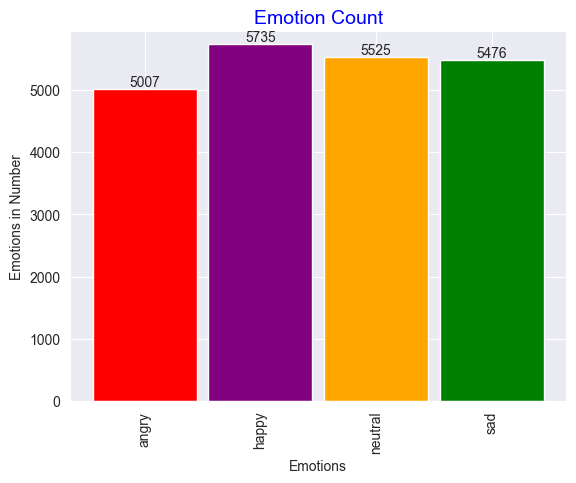

In [7]:
plt.bar(emotionCountfromFeatures.keys(), emotionCountfromFeatures.values(), width=0.9, align="center",
         color=["red","purple","orange","green","cyan","blue","yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCountfromFeatures.values()) + 200])
lst = []
for item in emotionCountfromFeatures:
    plt.text(item, emotionCountfromFeatures[item],
             emotionCountfromFeatures[item], ha="center", va="bottom")
sorted(emotionCountfromFeatures)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17394, 162), (17394,), (4349, 162), (4349,))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17394, 162), (17394,), (4349, 162), (4349,))

In [10]:
kernelchoice = ["rbf"]
# kernelchoice = ["linear"]
# C_choice = [100, 150, 200, 250, 300]
# C_choice = [0.5, 0.6, 0.8, 0.9, 1]
C_choice = [0.5, 0.6, 0.8, 0.9, 1,10,50,100]
import random

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

for i in C_choice:
    a=random.choice(kernelchoice)
    b=random.choice(C_choice)
    classifier = svm.SVC(kernel=a, gamma="auto", C=i)
    classifier = OneVsRestClassifier(classifier)
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    accuracyPercent = accuracy_score(y_test, y_predict) * 100
    print("Kernel:  "+ a + "  ||  "+" C: " + str(i) +"  ||  Accuracy"+ "  :  " + str(accuracyPercent))

Kernel:  rbf  ||   C: 0.5  ||  Accuracy  :  75.18969878132904
Kernel:  rbf  ||   C: 0.6  ||  Accuracy  :  75.5116118647965
Kernel:  rbf  ||   C: 0.8  ||  Accuracy  :  75.94849390664521
Kernel:  rbf  ||   C: 0.9  ||  Accuracy  :  75.9944814899977
Kernel:  rbf  ||   C: 1  ||  Accuracy  :  76.13244424005518
Kernel:  rbf  ||   C: 10  ||  Accuracy  :  80.29432053345596
Kernel:  rbf  ||   C: 50  ||  Accuracy  :  81.62796045067832
Kernel:  rbf  ||   C: 100  ||  Accuracy  :  82.50172453437573


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       angry       0.87      0.83      0.85       975
       happy       0.82      0.82      0.82      1197
     neutral       0.79      0.84      0.81      1090
         sad       0.84      0.81      0.82      1087

    accuracy                           0.83      4349
   macro avg       0.83      0.83      0.83      4349
weighted avg       0.83      0.83      0.83      4349



In [13]:
yPred = classifier.predict(x_train)
print(accuracy_score(y_train, yPred))

0.8960561113027481


In [14]:
# import joblib
# joblib.dump(classifier,"audio_svm_model_AllCombined.joblib")

Confusion matrix, without normalization


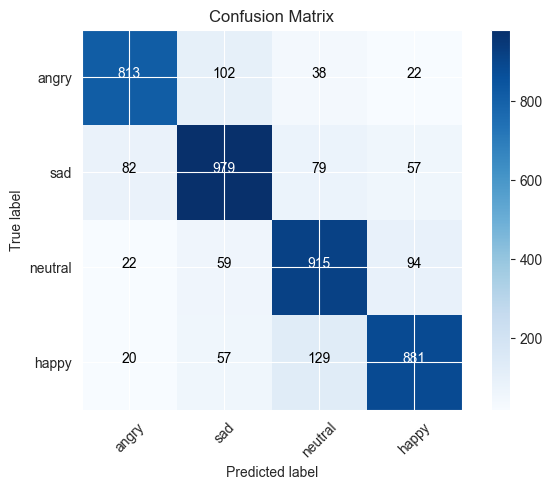

In [16]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion = confusion_matrix(y_test, y_predict)
# df_confusion = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

plot_confusion_matrix(confusion, classes=["angry", "sad", "neutral", "happy"],
                      title='Confusion Matrix')
plt.show()